# A Look at K-NN Classification

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     naive_bayes, neighbors)

## First, using iris dataset
In this example, I picked out two features from the iris dataset for prediction of the iris species (setosa, versicolor, or virginica).

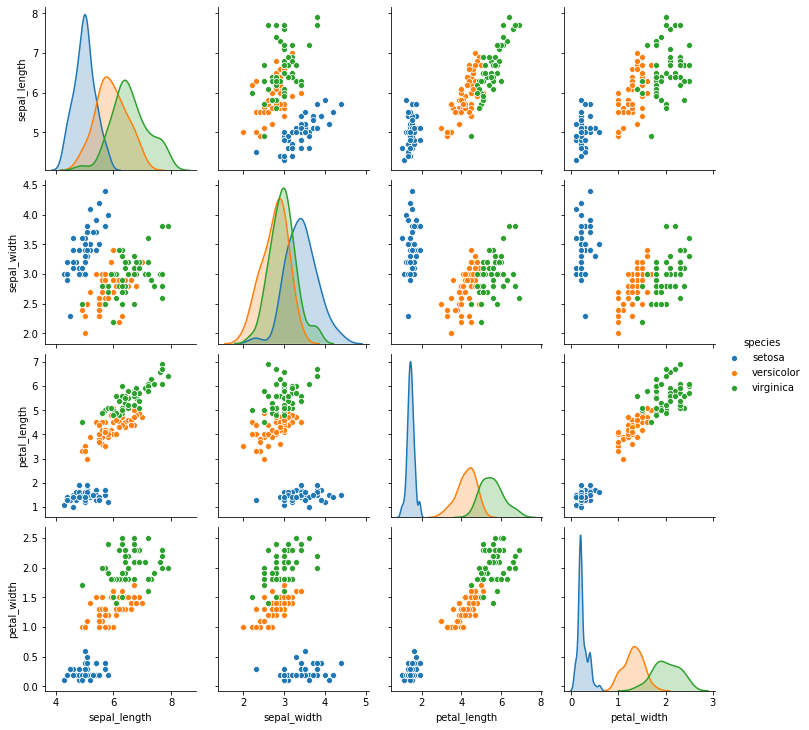

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()
sns.pairplot(iris_df,hue='species');

In [3]:
#--------------------------------------------
# kNN classification trained on two features 
#--------------------------------------------
f1 = 'petal_length'
f2 = 'petal_width'

# create dataframe with desired features
iris_features = iris_df[[f1,f2]]

# extract target as species column 
iris_target = iris_df['species']
# convert species to numbers (and save labels) 
iris_target, iris_target_labels = pd.factorize(iris_target)

# separate into training/testing sets
(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris_features,
                                                        iris_target,
                                                        test_size=.25)

# Set-up k-NN (k = 3) model and train on training data
model = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = model.fit(iris_train_ftrs, iris_train_tgt)

# Apply trained model to test data and evaluate using accuracy metric
predictions_test = fit.predict(iris_test_ftrs)
score = metrics.accuracy_score(iris_test_tgt, predictions_test)
print(f'kNN model accuracy: {score:0.2f}')

kNN model accuracy: 0.97


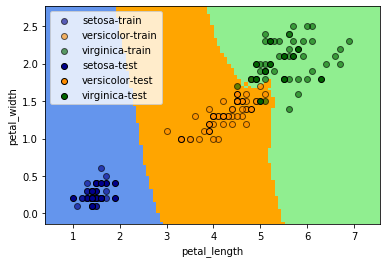

In [4]:
#------------------------------------------
# get meshgrid of f1 and f2 values to plot
#------------------------------------------
# start with actual min/max of f1 and f2
min_f1_val = iris_df[f1].min()
max_f1_val = iris_df[f1].max()
min_f2_val = iris_df[f2].min()
max_f2_val = iris_df[f2].max()
# increase range slightly
min_f1_val = min_f1_val - (max_f1_val - min_f1_val)/10
max_f1_val = max_f1_val + (max_f1_val - min_f1_val)/10
min_f2_val = min_f2_val - (max_f2_val - min_f2_val)/10
max_f2_val = max_f2_val + (max_f2_val - min_f2_val)/10
# use linspace to get array of 100 points for 
# f1 and f2 and in expanded range
f1_vals_to_plot = np.linspace(min_f1_val, max_f1_val, 100)
f2_vals_to_plot = np.linspace(min_f2_val, max_f2_val, 100)
# get meshgrid of f1 and f2 vlaues
f1_grid, f2_grid = np.meshgrid(f1_vals_to_plot,f2_vals_to_plot)

#------------------------------------------------
# get prediction for every point on feature grid
#------------------------------------------------
# create dataframe with one column for flattened f1 values and another
# column for flattened f2 values
f1_f2_grids_flat_df = pd.DataFrame({f1: f1_grid.ravel(), f2: f2_grid.ravel()})
#display(pd.concat([f1_f2_grids_flat_df.head(),
#                   f1_f2_grids_flat_df.tail()]))
# apply predictions on dataframe
predictions_grid_flat= fit.predict(f1_f2_grids_flat_df)
# reshape back to 2D
predictions_grid = predictions_grid_flat.reshape(f1_grid.shape)

#--------------------------
# plot grid of predictions
#--------------------------
cmap_light = ListedColormap(['cornflowerblue', 'orange', 'lightgreen'])
plt.pcolormesh(f1_grid,f2_grid,predictions_grid,cmap=cmap_light);

#-----------------------------------
# also plot training/testing points
#-----------------------------------
# plot the training points (one species at a time)
scatter_colors = ['darkblue', 'darkorange', 'darkgreen']
for i in range(len(iris_target_labels)):
    species_df = iris_train_ftrs[iris_train_tgt == i]
    plt.scatter(species_df[f1],species_df[f2],
                c=scatter_colors[i],alpha=0.6,
                label=iris_target_labels[i] + '-train',
                edgecolors='k')

# plot the testing points (one species at a time)
for i in range(len(iris_target_labels)):
    species_df = iris_test_ftrs[iris_test_tgt == i]
    plt.scatter(species_df[f1],species_df[f2],
                c=scatter_colors[i],
                label=iris_target_labels[i] + '-test',
                edgecolors='k')

plt.legend()
plt.xlabel(f1);
plt.ylabel(f2);

In [5]:
# assign f1/f2 values (assuming f1 is petal_length and f2 is petal_width)
f1_value = 5.00
f2_value = 1.65

# used trained k-NN to obtain classification
prediction = fit.predict([[f1_value,f2_value]])
print('Classification using trained k-NN:', iris_target_labels[prediction[0]])

# compute distance of point to all samples in training set
dist = np.sqrt((iris_train_ftrs[f1]-f1_value)**2 + (iris_train_ftrs[f2]-f2_value)**2)

# create pandas DataFrame for display, sort by distance values,
# and display the three closest neighbors (the predicted class
# would be the majority class of what is displayed)
dist_df = iris_train_ftrs.copy()
dist_df['dist'] = dist
dist_df['species'] = iris_train_tgt # numbers
dist_df['species'] = dist_df['species'].map(lambda x: iris_target_labels[x]) # labels
display(dist_df.sort_values('dist').head(3))

Classification using trained k-NN: versicolor


,petal_length,petal_width,dist,species
77,5.0,1.7,0.050000,versicolor
83,5.1,1.6,0.111803,versicolor
52,4.9,1.5,0.180278,versicolor


## Now moving onto prediction of olympic sport from height and weight using athlete data from 2016 Summer Olympics in Rio de Janeiro.

In this example, we will work with a dataset of the athletes from the 2016 Summer Olympics in Rio de Janeiro (downloaed from https://www.kaggle.com/rio2016/olympic-games/data) to predict the olympic sport from height and weight data.

['fencing' 'athletics' 'aquatics' 'rugby sevens' 'football' 'volleyball'
 'judo' 'shooting' 'wrestling' 'rowing' 'equestrian' 'golf' 'table tennis'
 'archery' 'basketball' 'canoe' 'sailing' 'triathlon' 'tennis' 'hockey'
 'cycling' 'gymnastics' 'handball' 'taekwondo' 'badminton' 'weightlifting'
 'modern pentathlon']


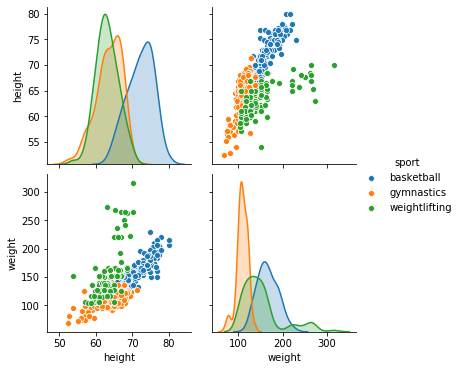

In [6]:
rio_athletes_df_orig = pd.read_csv('rio_athletes.csv')
# sex to analyze (feel free to try either one):
sex_to_analyze = 'female'
#sex_to_analyze = 'male'

# limit to one sex and create dataframe of only height/weight/sport columns 
rio_athletes_df = (rio_athletes_df_orig[rio_athletes_df_orig['sex'] == sex_to_analyze])[['height','weight','sport']]

# convert height from meters to inches
rio_athletes_df['height'] = rio_athletes_df['height']*39.3701

# convert weight from kg to lbs
rio_athletes_df['weight'] = rio_athletes_df['weight']*2.20462

# remove any rows with missing values
rio_athletes_df.dropna(inplace=True)

# display unique sports (to help us select a different set of 
# sports, if we so choose)
print(rio_athletes_df['sport'].unique())

# limit data to a smaller number of sports
sports_to_analyze = ['basketball', 'gymnastics', 'weightlifting']
rio_athletes_to_analyze = rio_athletes_df[rio_athletes_df['sport'].isin(sports_to_analyze)].copy()

# display 
rio_athletes_to_analyze.head()
sns.pairplot(rio_athletes_to_analyze,hue='sport');

In [7]:
height = 60
weight = 120
dist = np.sqrt((rio_athletes_to_analyze['height']-height)**2 + (rio_athletes_to_analyze['weight']-weight)**2)
rio_athletes_to_analyze['dist'] = dist
display(rio_athletes_to_analyze.sort_values('dist').head(10))

,height,weight,sport,dist
3292,61.023655,121.25410,gymnastics,1.618838
8916,61.417356,119.04948,gymnastics,1.706572
10785,61.811057,119.04948,gymnastics,2.045340
6252,61.811057,121.25410,gymnastics,2.202883
5525,61.811057,121.25410,gymnastics,2.202883
9206,62.204758,119.04948,gymnastics,2.400926
9889,62.992160,119.04948,gymnastics,3.139508
6028,62.992160,119.04948,gymnastics,3.139508
9589,59.842552,116.84486,weightlifting,3.159066
2588,59.448851,116.84486,weightlifting,3.202916


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


1                fencing
8              athletics
14              aquatics
15          rugby sevens
18              football
46            volleyball
65                  judo
99              shooting
100            wrestling
101               rowing
103           equestrian
110                 golf
130         table tennis
131              archery
132           basketball
141                canoe
143              sailing
154            triathlon
157               tennis
162               hockey
193              cycling
210           gymnastics
213             handball
220            taekwondo
235            badminton
289        weightlifting
490    modern pentathlon
Name: sport, dtype: object

,height,weight,sport,age
1,66.141768,123.45872,fencing,29
14,70.078778,149.91416,aquatics,19
64,65.354366,134.48182,aquatics,26
137,62.204758,116.84486,aquatics,17
142,66.929170,127.86796,aquatics,18


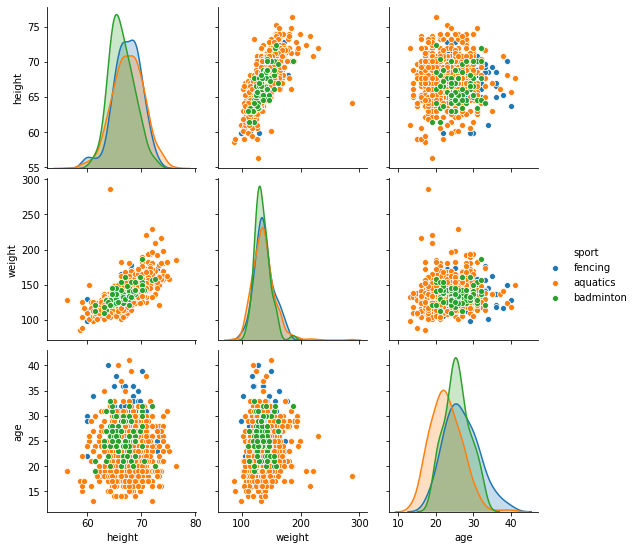

In [8]:
rio_athletes_df_orig = pd.read_csv('rio_athletes.csv')
# sex to analyze (feel free to try either one):
sex_to_analyze = 'female'
#sex_to_analyze = 'male'

display(rio_athletes_df_orig)

# limit to one sex and create dataframe of only dob/height/weight/sport columns 
rio_athletes_df = (rio_athletes_df_orig[rio_athletes_df_orig['sex'] == sex_to_analyze])[['dob','height','weight','sport']]

# remove any rows with missing values
rio_athletes_df.dropna(inplace=True)

# convert height from meters to inches
rio_athletes_df['height'] = rio_athletes_df['height']*39.3701

# convert weight from kg to lbs
rio_athletes_df['weight'] = rio_athletes_df['weight']*2.20462

# convert date strings to actual dates (date object)
from datetime import datetime
date_format = "%m/%d/%y"  # month zero padded, day zero padded, 2-didgit year
rio_athletes_df['dob'] = rio_athletes_df['dob'].map(lambda x: datetime.strptime(x,date_format))

# add age column (at start of games: 8/5/2016)
from dateutil.relativedelta import relativedelta
olympics_start = datetime.strptime('08/05/2016','%m/%d/%Y')
rio_athletes_df['age'] = rio_athletes_df['dob'].map(lambda x: relativedelta(olympics_start,x).years)

# drop dob column as we no longer need it
rio_athletes_df = rio_athletes_df.drop(['dob'],axis=1)

# Comment/Uncomment these 2 lines -- to hide/see the list of all sports
# The .drop_duplicates() method returns a new dataframe
unique_sports = rio_athletes_df['sport'].drop_duplicates()
display(unique_sports)

# select 3 sports at random
sports_to_analyze = unique_sports.sample(n=3)
rio_athletes_df = rio_athletes_df[rio_athletes_df['sport'].isin(sports_to_analyze)]
display(rio_athletes_df.head())

# show pairplot
sns.pairplot(rio_athletes_df, hue='sport');

### Dividing into train/test sets (75% for training/25% for testing) and perform k-NN (k = 3) classification (fitting model to training set and reporting accuracy on test set).

In [9]:
#----------------------------------------------------------------
# Separate features from targets so we can call train_test_split
#----------------------------------------------------------------
# YOUR CODE HERE
rio_target = rio_athletes_df['sport']
rio_features = rio_athletes_df.drop(['sport'],axis=1)
rio_target, rio_target_labels = pd.factorize(rio_target)


#-------------------------------------------------------------
# Separate into train and test sets (25% of data for testing)
#-------------------------------------------------------------
# YOUR CODE HERE
(rio_train_ftrs, rio_test_ftrs,
 rio_train_tgt, rio_test_tgt) = skms.train_test_split(rio_features,
                                                      rio_target,
                                                      test_size=.25)

#----------------------------------------------
# Set-up k-NN model and train on training data
#----------------------------------------------
# YOUR CODE HERE
kNN_model = neighbors.KNeighborsClassifier(n_neighbors=3)
kNN_fit = kNN_model.fit(rio_train_ftrs, rio_train_tgt)

model = naive_bayes.GaussianNB()
fit = model.fit(rio_train_ftrs, rio_train_tgt)
#---------------------------------------------------------------------
# Apply trained model to test data and evaluate using accuracy metric
#---------------------------------------------------------------------
# YOUR CODE HERE
kNN_predictions = kNN_fit.predict(rio_test_ftrs)
kNN_score = metrics.accuracy_score(rio_test_tgt, kNN_predictions)
print(f'kNN model accuracy: {kNN_score:0.2f}')

kNN model accuracy: 0.73


### Defining values of your choice for the height, weight, and age and display what sport the classifier you trained above would predict for this set of values. Also, computing the Euclidean distance to each sample in the Training set

In [14]:
#-------------------------------------------------------------
# Define values for weight, height, and age; apply classifier
# trained above; and display corresponding prediction
#-------------------------------------------------------------
# YOUR CODE HERE
w1 = 57.00
h1 = 77.00
a1 = 16.00

prediction = fit.predict([[w1,h1,a1]])
print('Classification using trained k-NN:', rio_target_labels[prediction[0]])

dist = np.sqrt((rio_train_ftrs['weight']-w1)**2 + (rio_train_ftrs['height']-h1)**2 + (rio_train_ftrs['age']-a1)**2)
dist_df = rio_train_ftrs.copy()
dist_df['dist'] = dist
dist_df['sport'] = rio_train_tgt # numbers
dist_df['sport'] = dist_df['sport'].map(lambda x: rio_target_labels[x]) # labels
display(dist_df.sort_values('dist').head(10))

#---------------------------------------------------------
# Compute the (Euclidean) distance to each sample in the 
# training set and display the 10 closest points as a
# pandas DataFrame. 
#---------------------------------------------------------

Classification using trained k-NN: aquatics


,height,weight,age,dist,sport
5890,58.661449,85.98018,17,34.309668,aquatics
7371,59.055150,88.18480,15,35.993185,aquatics
3598,61.023655,99.20790,13,45.229973,aquatics
6103,62.992160,101.41252,19,46.665742,aquatics
6337,59.842552,99.20790,29,47.380216,fencing
11200,66.535469,103.61714,21,48.038153,aquatics
9225,64.173263,103.61714,19,48.442573,aquatics
7571,59.055150,103.61714,16,49.951731,aquatics
10796,65.354366,105.82176,20,50.350621,aquatics
4213,61.023655,101.41252,34,50.514508,fencing
